In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

from keras import layers, models, backend, optimizers, regularizers
from keras.models import Model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image

In [2]:
print(tf.__version__)

2.9.1


In [4]:
# Train and Test Image Directories
train_img_dir = "D:Development/Data_Science_Datasets/Monkeypox_skinlesion/Original/Train/"
test_img_dir = "D:Development/Data_Science_Datasets/Monkeypox_skinlesion/Original/Test/"
val_img_dir = "D:Development/Data_Science_Datasets/Monkeypox_skinlesion/Original/Val/"

# Basic variables
val_batch_size = 51
val_img_height = 224
val_img_width = 224
val_validation_split = None
val_subset = None
val_shuffle = True
val_labels = 'inferred'
val_seed = 56
val_channels = 3
val_interpolation = 'gaussian'
val_steps_per_epochs = 95
val_learning_rate = 0.0003
val_epoch = 5

In [5]:
train_img_ds = tf.keras.utils.image_dataset_from_directory(
    train_img_dir,
    validation_split = val_validation_split,
    subset = val_subset,
    seed = val_seed,
    image_size=(val_img_height, val_img_width),
    batch_size = val_batch_size, 
    shuffle = val_shuffle,
    labels = val_labels,
    interpolation = val_interpolation)

Found 2156 files belonging to 2 classes.


In [6]:
test_img_ds = tf.keras.utils.image_dataset_from_directory(
    test_img_dir,
    validation_split = val_validation_split,
    subset = val_subset,
    seed = val_seed,
    image_size=(val_img_height, val_img_width),
    batch_size = val_batch_size, 
    shuffle = val_shuffle,
    labels = val_labels,
    interpolation = val_interpolation)

Found 45 files belonging to 2 classes.


In [7]:
val_img_ds = tf.keras.utils.image_dataset_from_directory(
    val_img_dir,
    validation_split = val_validation_split,
    subset = val_subset,
    seed = val_seed,
    image_size=(val_img_height, val_img_width),
    batch_size = val_batch_size, 
    shuffle = val_shuffle,
    labels = val_labels,
    interpolation = val_interpolation)

Found 406 files belonging to 2 classes.


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [9]:
norm_train_img_ds = train_img_ds.map(lambda x, y: (normalization_layer(x), y))

In [10]:
norm_test_img_ds = test_img_ds.map(lambda x, y: (normalization_layer(x), y))

In [11]:
norm_val_img_ds = val_img_ds.map(lambda x, y: (normalization_layer(x), y))

In [12]:
class_names = train_img_ds.class_names
print(class_names)

['Monkeypox', 'Others']


In [13]:
model = tf.keras.applications.resnet50.ResNet50(include_top=True, weights='imagenet')

In [14]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [15]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)

In [16]:
optimizer = optimizers.Adam(lr_schedule)

In [17]:
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

In [18]:
model.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history = model.fit(norm_train_img_ds,  epochs=5, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/5
43/43 [==============================] - 912s 21s/step - loss: 1.0692 - Sparse_CategoricalCrossentropy: 1.0532 - accuracy: 0.8191 - val_loss: 2.1325 - val_Sparse_CategoricalCrossentropy: 2.1328 - val_accuracy: 0.5862
Epoch 2/5
43/43 [==============================] - 928s 22s/step - loss: 0.0752 - Sparse_CategoricalCrossentropy: 0.0740 - accuracy: 0.9703 - val_loss: 1.7592 - val_Sparse_CategoricalCrossentropy: 1.7602 - val_accuracy: 0.5862
Epoch 3/5
43/43 [==============================] - 936s 22s/step - loss: 0.0149 - Sparse_CategoricalCrossentropy: 0.0165 - accuracy: 0.9958 - val_loss: 2.2708 - val_Sparse_CategoricalCrossentropy: 2.2717 - val_accuracy: 0.5862
Epoch 4/5
43/43 [==============================] - 930s 22s/step - loss: 0.0133 - Sparse_CategoricalCrossentropy: 0.0148 - accuracy: 0.9949 - val_loss: 2.5933 - val_Sparse_CategoricalCrossentropy: 2.5941 - val_accuracy: 0.5862
Epoch 5/5
43/43 [==============================] - 928s 22s/step - loss: 0.0141 - Sparse_Cat

Text(0.5, 1.0, 'ResNet50 Learning-rate 3e-4')

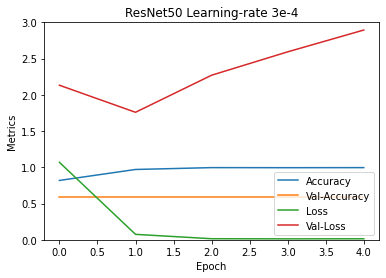

In [19]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.0, 3])
plt.legend(loc='lower right')
plt.title('ResNet50 Learning-rate 3e-4')

In [20]:
test_loss, test_sparse_entropy, test_acc = model.evaluate(test_img_ds,  verbose=2)
print(test_acc)

1/1 - 4s - loss: 1.2826 - Sparse_CategoricalCrossentropy: 1.2826 - accuracy: 0.6667 - 4s/epoch - 4s/step
0.6666666865348816


In [21]:
test_loss, test_sparse_entropy, test_acc = model.evaluate(norm_test_img_ds,  verbose=2)
print(test_acc)

1/1 - 4s - loss: 3.2241 - Sparse_CategoricalCrossentropy: 3.2241 - accuracy: 0.5556 - 4s/epoch - 4s/step
0.5555555820465088
